<a href="https://colab.research.google.com/github/hellosmallkat/NSDC-Explainable-Diabetes-Prediction-Project/blob/main/Copy_of_Explainable_Diabetes_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
    NSDC Data Science Projects
</h1>
  
<h2 align="center">
    Project: Explainable Diabetes Prediction Project
</h2>

<h3 align="center">
    Name: hellosmallkat
</h3>

### **Please read before you begin your project**

**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

Certain parts of this project will be completed individually, while other parts are encouraged to be completed with the rest of your team. In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive. Each member of your team should work on their personal copy.

Please rename the file to "Explainable Diabetes Prediction Project - Your Full Name." Once this project is completed, you will be prompted to share your file with the National Student Data Corps (NSDC) Project Leaders.

You can now start working on the project. :)

We'll be using Google Colab for this assignment. This is a Python Notebook environment built by Google that's free for everyone and comes with a nice UI out of the box. For a comprehensive guide, see Colab's official guide [here](https://colab.research.google.com/github/prites18/NoteNote/blob/master/Welcome_To_Colaboratory.ipynb).

Colab QuickStart:
- Notebooks are made up of cells, cells can be either text or code cells. Click the +code or +text button at the top to create a new cell
- Text cells use a format called [Markdown](https://www.markdownguide.org/getting-started/). Cheatsheet is available [here](https://www.markdownguide.org/cheat-sheet/)
- Python code is run/executed in code cells. You can click the play button at the top left of a code block (sometimes hidden in the square brackets) to run the code in that cell. You an also hit shift+enter to run the cell that is currently selected. There is no concurrency since cells run one at a time but you can queue up multiple cells
- Each cell will run code individually but memory is shared across a notebook Runtime. You can think of a Runtime as a code session where everything you create and execute is temporarily stored. This means variables and functions are available between cells if you execute one cell before the other (physical ordering of cells does not matter). This also means that if you delete or change the name of something and re-execute the cell, the old data might still exist in the background. If things aren't making sense, you can always click Runtime -> restart runtime to start over.
- Runtimes will persist for a short period of time so you are safe if you lose connection or refresh the page but Google will shutdown a runtime after enough time has past. Everything that was printed out will remain on the page even if the runtime is disconnected
- Google's Runtimes come preinstalled with all the core python libraries (math, rand, time, etc) as well as common data analysis libraries (numpy, pandas, scikitlearn, matplotlib). Simply run `import numpy as np` in a code cell to make it available

# **Introduction**

---

This project focuses on building an end-to-end machine learning pipeline for predicting diabetes using the Pima Indians Diabetes Dataset. The primary goal is to address the class imbalance problem inherent in the dataset and explore the explainability and interpretability aspects of machine learning models.

We begin with data preprocessing and exploratory data analysis, followed by handling the imbalanced dataset using resampling strategies. Multiple classification algorithms are trained and evaluated to predict diabetes outcomes.
Beyond model performance, this project emphasizes explainable AI through the use of techniques such as LIME (Local Interpretable Model-agnostic Explanations) and SHAP (SHapley Additive exPlanations) to interpret model predictions and understand feature contributions.

By the end of this notebook, you will gain hands-on experience in:



*   Handling imbalanced datasets
*   Building and comparing ML models
*   Applying explainability tools (LIME & SHAP)
*   Deriving transparent, trustworthy insights from predictive models


Note : This project is intended solely for educational and analytical purposes.
It does not constitute medical advice, diagnosis, or treatment, nor should it be used to guide healthcare decisions.

The dataset used in this analysis is derived from a specific population, and the findings do not generalize to all individuals or communities. Any insights or model predictions should be interpreted with this limitation in mind.









# **Milestone 1. Exploratory Data Analysis**

In [ ]:
#importing the necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, roc_curve, roc_auc_score
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
#Load the dataset
data = pd.read_csv('diabetes.csv')

In [ ]:
#Take a glance at the dataset
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
#Look out for any missing values in any of the columns
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h4>
Histograms are simple bar charts that show how your numbers are spread out. They help you spot basic patterns quickly: is most of the data bunched on one side (skewed), are there a few values far away from the rest (outliers), is the spread very wide or very narrow (scale), and do there seem to be two or more bumps (possible subgroups)? If a feature is very skewed, you might try a log transform; if you see outliers, you might cap or review them; if the spread is very different from other features, you might scale it
</h4>

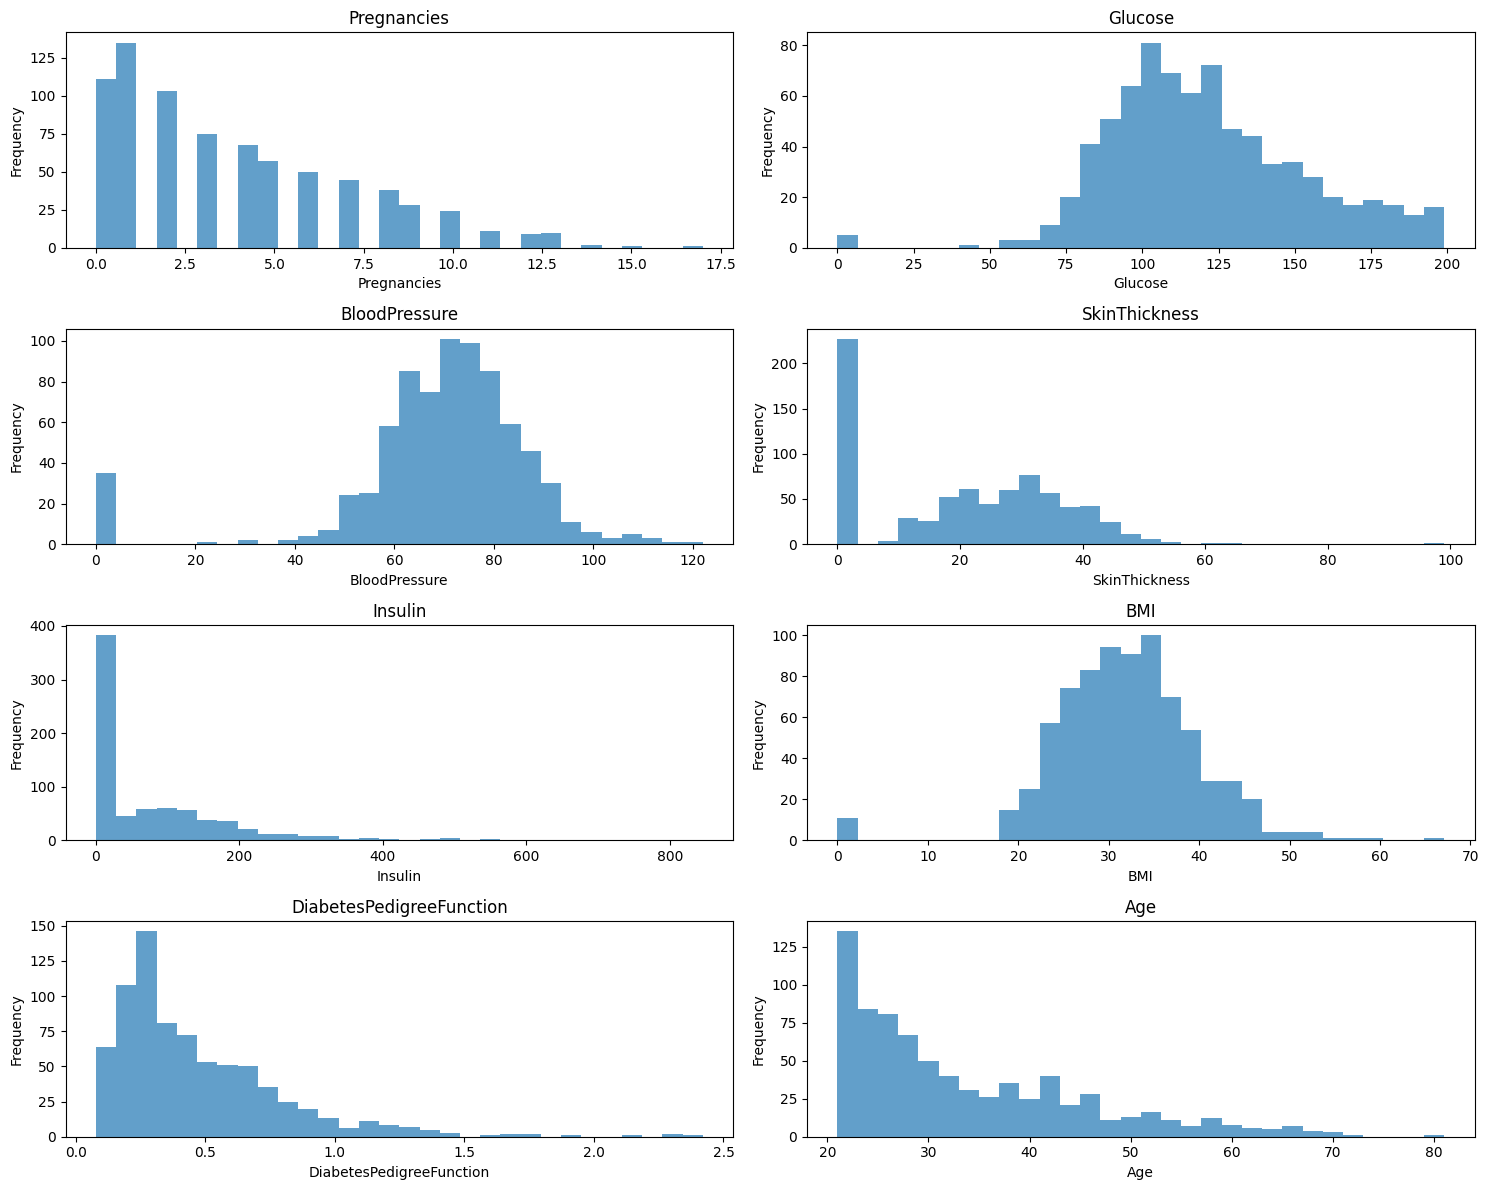

In [ ]:
#Checking the distribution of each numeric columns
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
        axes[i].hist(data[col], bins=30, alpha=0.7,)
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
#Lets evaluate the class distribution of the Outcome variable and determine the degree of class imabalance if exist
data['Outcome'].value_counts()
print("The proportion of class 0 is : ",(((data['Outcome']==0).sum())/data.shape[0])*100)
print("\nThe proportion of class 1 is : ",(((data['Outcome']==____).sum())/data.shape[0])*100)

print("\n")

outcome_counts = data['Outcome'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(['No Diabetes (0)', 'Diabetes (1)'], outcome_counts.values)
plt.title('Distribution of Outcome Variable')
plt.ylabel('Count')
plt.____()

<h3> We see a mild degree of class imbalance. Keeping this in mind, we will perform stratified sampling to split the dataset into training set and testing set </h3>

<h3> Before we proceed with splitting the dataset, we will first perform data preprocessing </h3>

<h3> First step under data processing is correlation analysis. We will determine if there are any highly correlated features. If there are, we will drop one of the highly correlated features </h3>

<h5> Highly correlated features are pairs or groups of input variables whose values move together so strongly that they carry nearly the same information. The correlation can be positive (both increase/decrease together) or negative (one increases as the other decreases); what matters is the magnitude of the relationship. We typically measure this with the Pearson correlation coefficient, which ranges from −1 to +1. Values near the extremes (e.g., magnitude of 0.8–0.9) indicate strong correlation, while values near 0 indicate little linear correlation (not necessarily independence). When a set of features is highly correlated, you can often keep one and drop or combine the others to reduce redundancy and simplify the model. </h5>

In [ ]:
plt.______(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt._____()

<h3> Based on the matrix, we can see there aren't any highly correlated features. Thus we will not drop any features and proceed with all the features </h3>

# **Milestone 2. Building Machine Learning models**

<h3> 2.1 : Next, we will split the dataset using stratified sampling. Stratified sampling is used when we have imbalanced dataset. Stratified sampling ensures we have the samples belonging to both the classses in the same ratio in the training set and test set</h3>

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
#checkout the sklearn documentation to determine which function splits the dataset into train and test
X_train_raw , X_test_raw , y_train , y_test = sklearn.model_selection._________(X,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

<h3>2.2 :  Next, we will train three machine learning models namely - Logistic Regression, Support Vector Machine and Decision tree on the existing dataset. Later we will train the same machine learning models after applying techniques like Undersampling, Oversampling and Synthetic Minority Oversampling Technique (to deal with imbalanced dataset)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<h4>1. Logistic Regression: In this section we will train a Logistic regression model, a linear classification algorithm that models the probability of class membership using the logistic (sigmoid) function. It’s simple, efficient, and interpretable, but limited in capturing non-linear patterns.  For evaluating all the models that we train in this project, we will plot the confusion matrix, classification report and the AUC-ROC curve.

In classification, we evaluate models with the following metrics.
1. Accuracy asks, “overall, how often am I right?”—good for balanced datasets but misleading when one class is rare.
2. Precision asks, “when I predict positive, how often is it truly positive?”—important when false alarms are costly.
3. Recall asks, “of all real positives, how many did I catch?”—crucial when misses are costly.
4. F1-score gives one number that balances precision and recall when both error types matter.
5. ROC-AUC looks at your model’s ability to rank truly positive cases above negatives across every possible threshold—higher means positives consistently rise to the top.

For detailed explaination about evaluation metrics visit [this](https://medium.com/@mlmind/evaluation-metrics-for-classification-fc770511052d) link

</h4>

To learn more about logistic regression check this [resource](https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/) !

In [ ]:
#Logistic Regression
lr = LogisticRegression(class_weight="balanced")
#the 'class_weight=balanced' parameter tells the model to assign class weight based on the frequency. This improves the performance of the model on the minority class. This paramater is useful when we have imbalanced dataset
logreg_model = lr.fit(X_train, y_train)

In [ ]:
#Next, we make predictions using the trained logistic regression model on the test dataset
predictions = logreg_model.predict(X_test)
print("Accuracy for Logistic regression is : " , accuracy_score(y_test,predictions))
print("Confusion matrix for Logistic regression is : \n" , confusion_matrix(y_test,predictions))
print("Classification report for Logistic Regression is: \n ",classification_report(y_test,predictions))

In [ ]:
#plot the roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Logistic Regression is : ", roc_auc_score(y_test,predictions))

<h4>2. Support Vector Machine : Next, we train another linear model, which is Support Vector Machine, which finds the optimal hyperplane that maximizes the margin between classes. They are powerful for high-dimensional data but can be computationally expensive and sensitive to kernel choice. </h4>

To learn more about Support Vector Machine check this [resource](https://www.geeksforgeeks.org/machine-learning/support-vector-machine-algorithm/) !

In [ ]:
#Support Vector Machine
svm = SVC(kernel='linear',class_weight='__________',C=1e4) #what value should be filled in the blank, given our dataset is imbalanced
svm_model = svm.fit(X_train, y_train)

In [ ]:
predictions = svm.predict(________) #on which part of the dataset do we make predictions
print("Accuracy for Support Vector Machine is : " , accuracy_score(y_test,predictions))
print("Confusion matrix for Support Vector Machine is : \n" , confusion_matrix(y_test,predictions))
print("Classification report for Support Vector Machine is: \n ",classification_report(y_test,predictions))

Accuracy for Support Vector Machine is :  0.7532467532467533
Confusion matrix for Support Vector Machine is : 
 [[77 23]
 [15 39]]
Classification report for Support Vector Machine is: 
                precision    recall  f1-score   support

           0       0.84      0.77      0.80       100
           1       0.63      0.72      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



The are under the curve for Support Vector Machine is :  0.7461111111111112


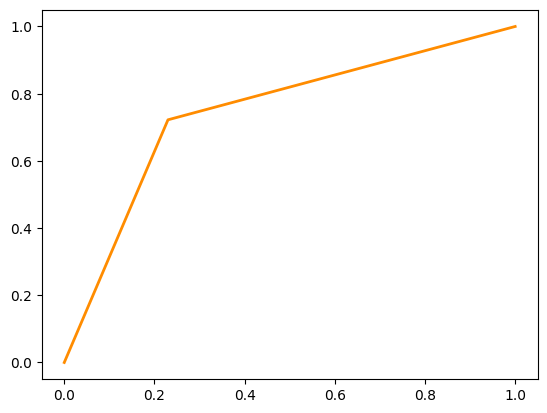

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Support Vector Machine is : ", roc_auc_score(y_test,predictions))

<h4>3. Decision Tree: Next we train decision tree, another classification algorithm that splits data based on feature values to form a tree of decisions, making predictions at the leaves. While easy to interpret, they can overfit without proper constraints or pruning. </h4>

To learn more about Decision Trees check this [resource](https://www.geeksforgeeks.org/machine-learning/decision-tree/) !

In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(criterion='entropy',class_weight='__________')
dt_model = dt.fit(X_train, y_train)

In [ ]:
predictions = dt_model.predict(X_test)
print("Accuracy for Decision Tree is : " , _____________(y_test,predictions)) #what functions have we used so far to evaluate our models
print("Confusion matrix for Decision Tree is : \n" , __________(y_test,predictions))
print("Classification report for Decision Tree is: \n ",____________(y_test,predictions))

Accuracy for Decision Tree is :  0.6883116883116883
Confusion matrix for Decision Tree is : 
 [[81 19]
 [29 25]]
Classification report for Decision Tree is: 
                precision    recall  f1-score   support

           0       0.74      0.81      0.77       100
           1       0.57      0.46      0.51        54

    accuracy                           0.69       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154



The are under the curve for Decision Tree is :  0.6364814814814815


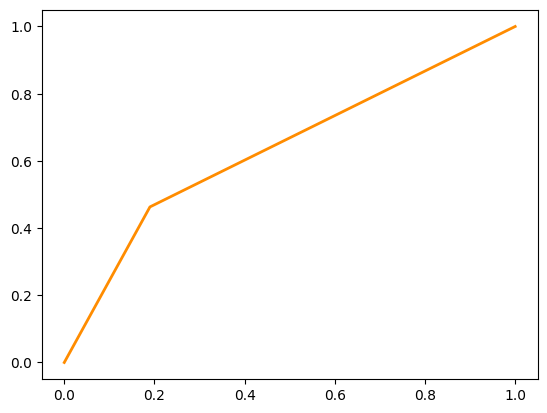

In [ ]:
fpr, tpr, thresholds = __________(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Decision Tree is : ", _________(y_test,predictions))

# **Milestone 3. Random Undersampling**

<h3> Random Undersampling works by downsampling the majority class to match the number of samples of the minority class. This removes class imbalance from the training set, but also leads to loss of data. </h3>

<h3> Step 1 : Building the Undesampled Data </h3>

In [ ]:
rus = RandomUnderSampler(random_state=42)
_______, _________ = rus.fit_resample(___________, ___________) #on which part of the data(or the entire data ?) will we perform undersampling


In [ ]:
______.value_counts()

Outcome
0    214
1    214
Name: count, dtype: int64

<h3>Step 2. Next, we will build the same machine learning models on the undersampled dataset and evaluate their performance.</h3>

<h4>1. Logistic Regression </h4>

In [ ]:
lr = __________() #make an object of Logistic Regression class
logreg_model = lr.______(________, __________) #what function and dataset would you use to train the model

In [ ]:
predictions = logreg_model._______(_________) #on which part of the dataset do we make predictions
print("Accuracy for Logistic regression on the Undersampled data is : " , _________(y_test,predictions))
print("Confusion matrix for Logistic regression on the Undersampled data is : \n" , _________(y_test,predictions))
print("Classification report for Logistic Regression on the Undersampled data is: \n ",_________(y_test,predictions))

Accuracy for Logistic regression on the Undersampled data is :  0.7402597402597403
Confusion matrix for Logistic regression on the Undersampled data is : 
 [[74 26]
 [14 40]]
Classification report for Logistic Regression on the Undersampled data is: 
                precision    recall  f1-score   support

           0       0.84      0.74      0.79       100
           1       0.61      0.74      0.67        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.76      0.74      0.74       154



The are under the curve for Logistic Regression on the Undersampled data is :  0.7403703703703703


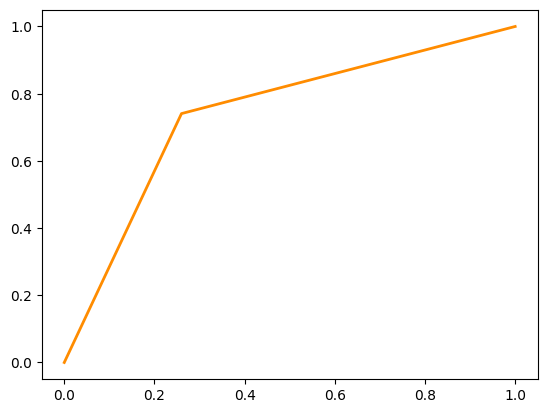

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Logistic Regression on the Undersampled data is : ", roc_auc_score(y_test,predictions))

<h4>2. Support Vector Machines </h4>

In [ ]:
svm = ________(________,C=1e4) #create an object of Support Vector Machine
svm_model = svm.fit(__________, __________) #what function and dataset would you use to train the model

In [ ]:
predictions = svm._______(________) #on which part of the dataset do we make predictions
print("Accuracy for Support Vector Machine on the Undersampled data is : " , ___________(________))
print("Confusion matrix for Support Vector Machine on the Undersampled data is : \n" , __________(_________))
print("Classification report for Support Vector Machine on the Undersampled data is: \n ",____________(_________))

Accuracy for Support Vector Machine on the Undersampled data is :  0.7337662337662337
Confusion matrix for Support Vector Machine on the Undersampled data is : 
 [[76 24]
 [17 37]]
Classification report for Support Vector Machine on the Undersampled data is: 
                precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



The are under the curve for Support Vector Machine on the Undersampled data is :  0.7225925925925926


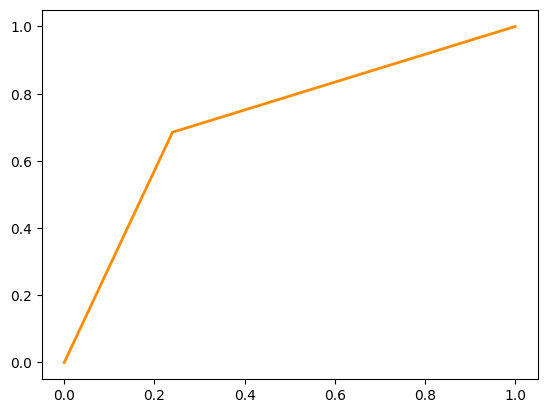

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Support Vector Machine on the Undersampled data is : ", ___________(y_test,predictions))

<h4> 3. Decision Tree </h4>

In [ ]:
dt = _________() #create an object for Decision Tree
dt_model = dt.______(_______, _______) #what function and dataset would you use to train the model


In [ ]:
predictions = dt_model.________(_______-) #on which part of the dataset do we make predictions
print("Accuracy for Decision Tree on the Undersampled data is : " , _________(______))
print("Confusion matrix for Decision Tree on the Undersampled data is : \n" , _________(________))
print("Classification report for Decision Tree on the Undersampled data is: \n ",__________(_________))


Accuracy for Decision Tree on the Undersampled data is :  0.7337662337662337
Confusion matrix for Decision Tree on the Undersampled data is : 
 [[76 24]
 [17 37]]
Classification report for Decision Tree on the Undersampled data is: 
                precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



The are under the curve for Decision Tree on the Undersampled data is :  0.7225925925925926


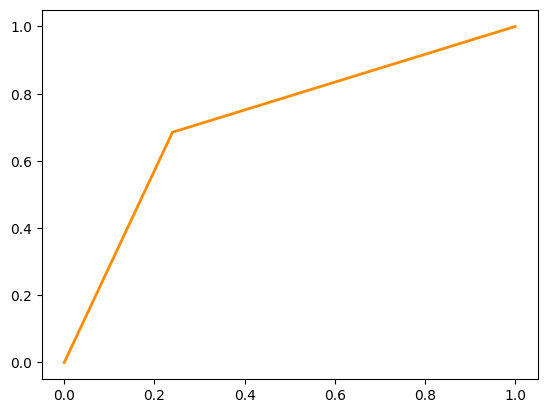

In [ ]:
fpr, tpr, thresholds = _________(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Decision Tree on the Undersampled data is : ", __________(y_test,predictions))

# **Milestone 4. Random Oversampling**


<h3> Random Oversampling works by randomly sampling (with replacement) instances from the minority class and adding it to the dataset. At the end of Random Oversampling, the number of instances from both the classes are equal. Since sampling is done with replacement, duplicates instances exist, but this helps to mitigate the bias towards the majority class that can occur during training.</h3>

<h3> 1. Building the oversampled dataset </h3>

In [ ]:
ros = RandomOverSampler(random_state=42)
________, ________ = ros.fit_resample(_________, __________) #on which part of the data(or the entire data ?) will we perform undersampling

In [ ]:
________.value_counts()

Outcome
0    400
1    400
Name: count, dtype: int64

<h3> 2. Building Machine Learning models on the oversampled dataset </h3>



<h4>1. Logistic Regression </h4>

In [ ]:
log_reg = ___________()
logreg_model = log_reg.fit(________, __________)

In [ ]:
predictions = logreg_model.__________(________)
print("Accuracy for Logistic regression on the Oversampled data is : " , accuracy_score(y_test,predictions))
print("Confusion matrix for Logistic regression on the Oversampled data is : \n" , confusion_matrix(y_test,predictions))
print("Classification report for Logistic Regression on the Oversampled data is: \n ",classification_report(y_test,predictions))

Accuracy for Logistic regression on the Oversampled data is :  0.7337662337662337
Confusion matrix for Logistic regression on the Oversampled data is : 
 [[75 25]
 [16 38]]
Classification report for Logistic Regression on the Oversampled data is: 
                precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



The are under the curve for Logistic Regression on the Oversampled data is :  0.7268518518518519


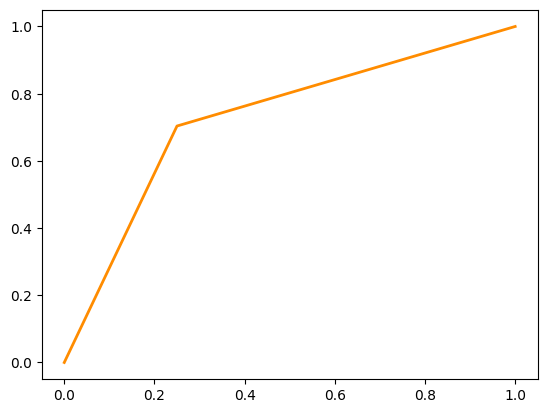

In [ ]:
fpr, tpr, thresholds = ________(___________)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Logistic Regression on the Oversampled data is : ", __________(___________))

<h4> 2. Support Vector Machines </h4>

In [ ]:
svm = ________(kernel='linear',C=1e4)
svm_model = svm.________(__________, ____________)

In [ ]:
predictions = svm.________(_______)
print("Accuracy for Support Vector Machine on the Oversampled data is : " , accuracy_score(y_test,predictions))
print("Confusion matrix for Support Vector Machine on the Oversampled data is : \n" , confusion_matrix(y_test,predictions))
print("Classification report for Support Vector Machine on the Oversampled data is: \n ",classification_report(y_test,predictions))

Accuracy for Support Vector Machine on the Oversampled data is :  0.7402597402597403
Confusion matrix for Support Vector Machine on the Oversampled data is : 
 [[76 24]
 [16 38]]
Classification report for Support Vector Machine on the Oversampled data is: 
                precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



The are under the curve for Support Vector Machine on the Oversampled data is :  0.7318518518518519


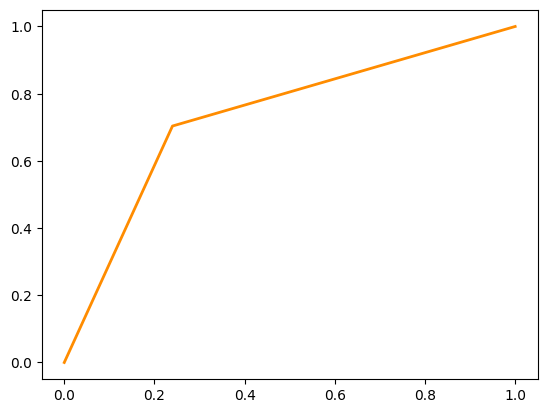

In [ ]:
fpr, tpr, thresholds = __________(____________)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Support Vector Machine on the Oversampled data is : ", ___________(___________))

<h4> 3. Decision Tree </h4>

In [ ]:
dt = ____________()
dt_model = dt._____(__________ , __________)

In [ ]:
predictions = dt._________(_________)
print("Accuracy for Decision Tree on the Oversampled data is : " , accuracy_score(___________, ___________))
print("Confusion matrix for Decision Tree on the Oversampled data is : \n" , confusion_matrix(_________ , _________))
print("Classification report for Decision Tree on the Oversampled data is: \n ",classification_report(_________ , _________))


Accuracy for Decision Tree on the Oversampled data is :  0.7727272727272727
Confusion matrix for Decision Tree on the Oversampled data is : 
 [[85 15]
 [20 34]]
Classification report for Decision Tree on the Oversampled data is: 
                precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



The are under the curve for Decision Tree on the Oversampled data is :  0.7398148148148149


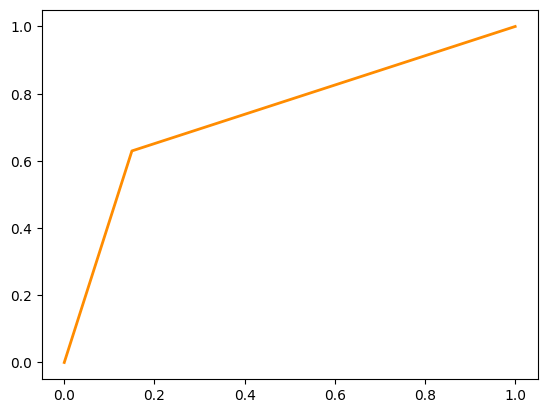

In [ ]:
fpr, tpr, thresholds = _________(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Decision Tree on the Oversampled data is : ", roc_auc_score(_______, _________))

#**Milestone 5. Synthetic Minority Oversampling Technique (SMOTE)**

 SMOTE is oversampling technique. It creates synthetic samples of the minority class until the number of instances of the minority class equal the number of majority class. [This article](https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c) explains the mathematics behind how the synthetic samples are created.

<h3>1. Building the dataset using SMOTE </h3>

In [ ]:
smote = SMOTE(random_state=42)
_________, _________- = smote.fit_resample(________, _________) #on which part of the data(or the entire data ?) will we perform undersampling

In [ ]:
_______.value_counts()

Outcome
0    400
1    400
Name: count, dtype: int64

<h3> 2. Building Machine Learning models on SMOTE dataset </h3>

#### 1\. Logistic Regression

In [ ]:
lr = LogisticRegression()
logreg_model_smote = lr.fit(_______, __________)

In [ ]:
predictions_smote = logreg_model_smote.predict(_________)
print("Accuracy for Logistic regression on the SMOTE data is : " , accuracy_score(_________, _________))
print("Confusion matrix for Logistic regression on the SMOTE data is : \n" , confusion_matrix(________, _________))
print("Classification report for Logistic Regression on the SMOTE data is: \n ",classification_report(__________, ___________))

Accuracy for Logistic regression on the SMOTE data is :  0.7402597402597403
Confusion matrix for Logistic regression on the SMOTE data is : 
 [[76 24]
 [16 38]]
Classification report for Logistic Regression on the SMOTE data is: 
                precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



The are under the curve for Logistic Regression on the SMOTE data is :  0.7318518518518519


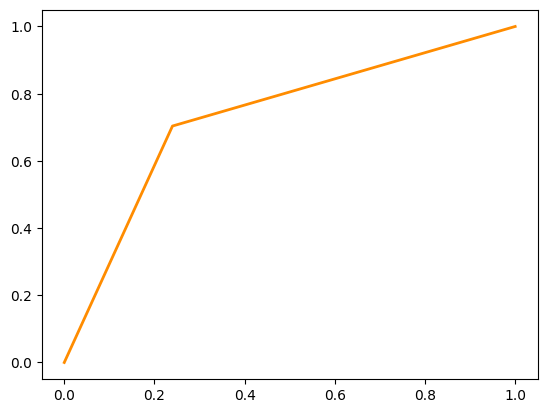

In [ ]:
fpr, tpr, thresholds = roc_curve(_______, __________)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Logistic Regression on the SMOTE data is : ", roc_auc_score(_______, __________))

#### 2\. Support Vector Machines

In [ ]:
svm = SVC(kernel='linear',C=1e4)
svm_model_smote = svm.fit(_______, __________)

In [ ]:
predictions_smote = svm_model_smote.predict(X_test)
print("Accuracy for Support Vector Machine on the SMOTE data is : " , accuracy_score(_______, __________))
print("Confusion matrix for Support Vector Machine on the SMOTE data is : \n" , confusion_matrix(_______, __________))
print("Classification report for Support Vector Machine on the SMOTE data is: \n ",classification_report(_______, __________))

Accuracy for Support Vector Machine on the SMOTE data is :  0.7272727272727273
Confusion matrix for Support Vector Machine on the SMOTE data is : 
 [[76 24]
 [18 36]]
Classification report for Support Vector Machine on the SMOTE data is: 
                precision    recall  f1-score   support

           0       0.81      0.76      0.78       100
           1       0.60      0.67      0.63        54

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.74      0.73      0.73       154



The are under the curve for Support Vector Machine on the SMOTE data is :  0.7133333333333333


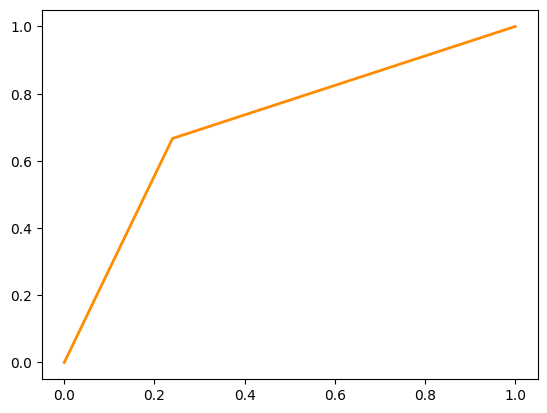

In [ ]:
fpr, tpr, thresholds = roc_curve(_______, __________)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Support Vector Machine on the SMOTE data is : ", roc_auc_score(_______, __________))

#### 3\. Decision Tree

In [ ]:
dt = _________()
dt_model_smote = dt.fit(_______, __________)

In [ ]:
predictions_smote = dt_model_smote.________(__________)
print("Accuracy for Decision Tree on the SMOTE data is : " , accuracy_score(_______, __________))
print("Confusion matrix for Decision Tree on the SMOTE data is : \n" , confusion_matrix(_______, __________))
print("Classification report for Decision Tree on the SMOTE data is: \n ",classification_report(_______, __________))

Accuracy for Decision Tree on the SMOTE data is :  0.6623376623376623
Confusion matrix for Decision Tree on the SMOTE data is : 
 [[74 26]
 [26 28]]
Classification report for Decision Tree on the SMOTE data is: 
                precision    recall  f1-score   support

           0       0.74      0.74      0.74       100
           1       0.52      0.52      0.52        54

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154



The are under the curve for Decision Tree on the SMOTE data is :  0.6292592592592592


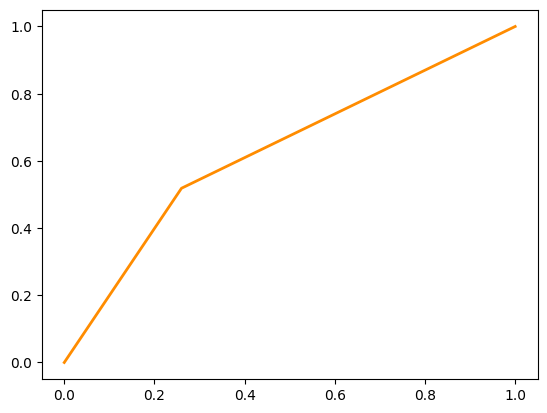

In [ ]:
fpr, tpr, thresholds = roc_curve(_______, __________)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
print("The are under the curve for Decision Tree on the SMOTE data is : ", roc_auc_score(_______, __________))

#**Milestone 6. Explainability and Interpretability**

<h2>1.Local Interpretable Model Agnostics Explainations (LIME) </h2>

<h3>In this module we will obtain the LIME plots for the models we trained on the SMOTE dataset. LIME explains which features contributed most to a specific prediction made by the model.</h3>

In [ ]:
#Install the lime package
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1709be5583247b60e6cd180f1629c18ad006cdb5834f148d26dcad2442f9ff13
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


<h3> 1. Logistic Regression </h3>

In [ ]:
from lime import lime_tabular
import numpy as np
import pandas as pd



#This created a lime explainer object
explainer = lime_tabular.LimeTabularExplainer(
    X_train_raw.to_numpy(dtype=float),                 # The training data in the original (unscaled) form
    feature_names=X_train_raw.columns.tolist(),        #Feature names in the dataset
    class_names=[str(c) for c in logreg_model_smote.classes_], #Informs LIME that 0= No Diabetes and 1=Diabetes
    mode='classification',                             # We are explaining a classification model
    discretize_continuous=True
)




cols = X_train_raw.columns.tolist()
'''This function takes LIME's raw numbers(the dataset value in unscaled format), puts them in DataFrame with correct column names, scales them using the same scaler
object used during training and then asks the model for prediction probabilities.'''
def predict_fn_unscaled(X_unscaled: np.ndarray):
    if not isinstance(X_unscaled, pd.DataFrame):
        X_unscaled = pd.DataFrame(X_unscaled, columns=cols)
    X_scaled = scaler.transform(X_unscaled)
    return logreg_model_smote.predict_proba(X_scaled)




#Pick any sample from the test data for which we need an explaination for its prediction
idx = 21
x0_raw = X_test_raw.iloc[idx].to_numpy(dtype=float)
x0_raw_df = pd.DataFrame([x0_raw], columns=cols)

# Get true + predicted labels
true_label = y_test.iloc[idx]
pred_label = logreg_model_smote.predict(scaler.transform(x0_raw_df))[0]

print(f"[LIME] Instance {idx} | True label: {true_label} | Predicted label: {pred_label}")




# Explain & visualize
'''LIME takes the raw instance, makes synthetic neighbors in original units, and passes them to the custom function (predict_fn_unscaled).
That function converts them into a DataFrame, scales them, and gets probabilities from your trained model.
LIME then combines these probabilities with the original features to show which ones drove the prediction.'''
exp = explainer.explain_instance(
    x0_raw,
    predict_fn_unscaled,
    num_features=len(cols)
)
exp.show_in_notebook(show_table=True, show_all=False) #Display the plot in the notebook output space




[LIME] Instance 21 | True label: 1 | Predicted label: 1


<h3>Interpretation of the plot</h3>

This is how we can interpret this and the following lime plots. We see that the model predicts the patient to have diabetes. As the probability of class 1 is 0.76 and the probability of class 0 is 0.26. The third plot shows us the feature values for this specific patient. The highlight colours of the features in the third plot tells us that the feature value pushes the model's prediction towards that class. Here orange colour is class 1 and blue is class 0.

The plot in the middle shows what contributed to the model's prediction. We see that since the glucose level for this patient is 189.00 which is higher than 140.00(the number used by the model to make a decision) which pushes the model's prediction towards class 1 and the weight of the feature glucose is 0.42.

Next, we observe that the blood pressure value is 60.00, which is less that or equal to 62.50(the value used by the model to make a decision). This pushes the model's prediction towards class and the weight for this feature is 0.10.

For age we observe that the patient's age is 59, which is greater than 41, which pushes the model's decision towards class 1.

Similarly, for insulin, we see that value of the feature insulin is 846 for this patient, which is greater than 130.00 which pushes the model's prediction towards class 0.

The overall efffect of the features pushes the model prediction towards class 1 and thus, the model classifies this patient as diabetic.


<h3>2. Decision Tree </h3>

In [ ]:
# ----- LIME for Decision Tree (dt_model_smote) -----
import pandas as pd
import numpy as np


explainer = lime_tabular.LimeTabularExplainer(
    _________.to_numpy(dtype=float),                 # raw values
    feature_names=_________.columns.tolist(),
    class_names=[str(c) for c in logreg_model_smote.classes_],
    mode='___________',
    discretize_continuous=True
)

idx=______
cols = __________.columns.tolist()

def predict_fn_dt(X_unscaled: np.ndarray):
    X_df = X_unscaled if isinstance(X_unscaled, pd.DataFrame) else pd.DataFrame(X_unscaled, columns=cols)
    X_scaled = ___________.transform(X_df)  #apply the same scaling used during model training
    return ____________.predict_proba(X_scaled) #call the decision tree trained on the dataset created using SMOTE

x_raw = _________.iloc[idx].to_numpy(float)
x_raw_df = pd.DataFrame([x_raw], columns=cols)
true_lbl = _________.iloc[idx]                  #from which part of the dataset will the true label come ?
pred_lbl = ___________.predict(scaler.transform(x_raw_df))[0] #call the model
print(f"[LIME-DT] Instance {idx} | True: {true_lbl} | Pred: {pred_lbl}")

exp_dt = explainer.explain_instance(
    x_raw, predict_fn_dt, num_features=len(cols)
)
exp_dt.show_in_notebook(show_table=True, show_all=False)


[LIME-DT] Instance 21 | True: 1 | Pred: 1


<h3>Based on the plot you obtain, please explain how would you interpret it here : </h3>

<h3> 3. Support Vector Machine </h3>

In [ ]:
# ----- LIME for SVM with predict_proba -----
# This cell will take around 2 minutes to run
from sklearn.calibration import CalibratedClassifierCV

svm_calibrated = CalibratedClassifierCV(svm_model_smote, method="sigmoid") #The calibrated classifier turns SVM's scores into probabilities. Because the LIME class expects probabilities.
svm_calibrated.fit(X_train_smote, y_train_smote)

explainer = lime_tabular.LimeTabularExplainer(
    ________.to_numpy(dtype=float),
    feature_names=__________.columns.tolist(),
    class_names=[str(c) for c in logreg_model_smote.classes_],
    mode='_________',
    discretize_continuous=True
)

idx=______

cols = __________.columns.tolist()

def predict_fn_svm(X_unscaled: np.ndarray):
    import pandas as pd
    X_df = X_unscaled if isinstance(X_unscaled, pd.DataFrame) else pd.DataFrame(X_unscaled, columns=cols)
    X_scaled = _______.transform(X_df)
    return svm_calibrated.predict_proba(X_scaled)


x_raw = _________.iloc[idx].to_numpy(float)
x_raw_df = pd.DataFrame([x_raw], columns=cols)
true_lbl = _________.iloc[idx]
pred_lbl = svm_calibrated.predict(scaler.transform(x_raw_df))[0]
print(f"[LIME-SVM] Instance {idx} | True: {true_lbl} | Pred: {pred_lbl}")

exp_svm = explainer.explain_instance(
    x_raw, predict_fn_svm, num_features=len(cols)
)
exp_svm.show_in_notebook(show_table=True, show_all=False)



[LIME-SVM] Instance 21 | True: 1 | Pred: 1


<h3>Based on the plot you obtain, please explain how would you interpret it here : </h3>

<h2> 2. Shapley Additive Explainations </h2>

<h3> SHAP shows how each feature contributes to predictions, both for individual cases and across the whole dataset.<h3>

In [ ]:
#SHAP BeeSwarm Plots
import shap, numpy as np, pandas as pd, matplotlib.pyplot as plt
shap.initjs()

feature_names = X_train_raw.columns.tolist() #features
bg_scaled = np.asarray(X_train_smote)


<h3> 1. Decision Tree </h3>

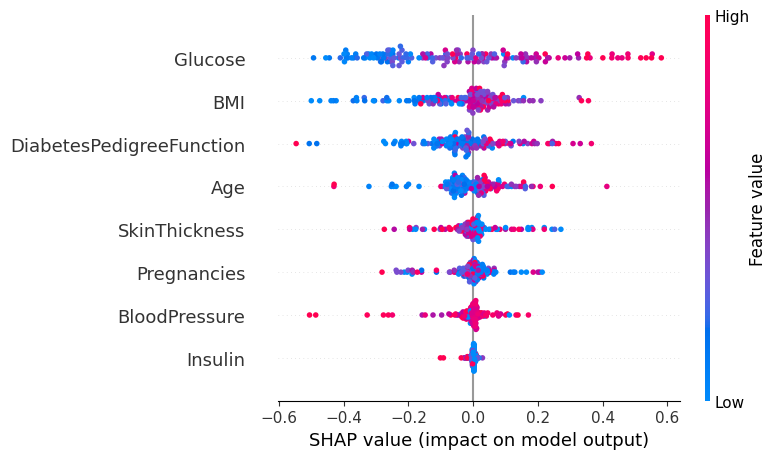

In [ ]:
dt_explainer = shap.TreeExplainer(dt_model_smote) #This creates a SHAP object for our trained decision tree model
dt_sv = dt_explainer.shap_values(X_test)   #This asks the explainer to compute the SHAP values for every row in the test set(scaled values)
dt_sv = dt_sv[:, :, 1]     #This selects only the shap values belonging to class 1. In other words, the SHAP values we select using this line will tell us if the feature value pushes towards or pushes against classes 'Diabetes'


# Global beeswarm in ORIGINAL units for coloring/labels
shap.summary_plot(
    dt_sv,                                     # The Shap values
    features=X_test_raw,                       # original feature values
    feature_names=list(X_train_raw.columns),   #Names of the features
    plot_type="dot",
    max_display=len(X_train_raw.columns)       #No top 'n' features. SHow all the features
)


This is how we will interpret the SHAP beeswarm plot. Glucose is the strongest driver, followed by BMI. Red values imply high values of that particular feature and blue value imply low value of that particular feature. These SHAP values are with respect to class 1, that is, Diabetes. For glucose, we can interpret, that a higher glucose value pushes the model prediction towards class 1 and a lower predicition drives the prediction towards class 0. We see a similar pattern for the feature Age. However, there are red points on both ends of the plot for feature Age.

<h3> 2. Logistic Regression </h3>

/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


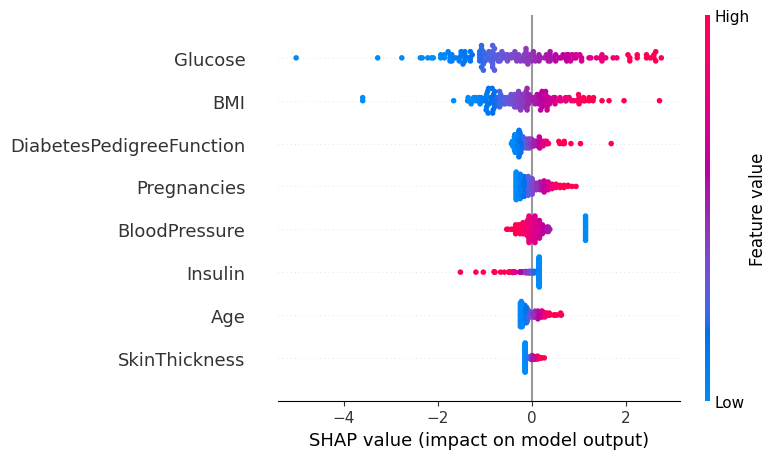

In [ ]:
# SHAP for Logistic Regression
lr_explainer = shap.LinearExplainer(
    _________,                        #the trained logisitic regresion model on SMOTE dataset
    X_train_smote,
    feature_perturbation="interventional"
)

lr_sv = lr_explainer.shap_values(________)


if isinstance(lr_sv, list):
    lr_sv = lr_sv[1]

# Beeswarm Plot
shap.summary_plot(
    lr_sv,
    features=__________,                   # use the unscaled(original) test values for visualization
    feature_names=list(_______.columns),   #list of feature names
    plot_type="dot",
    max_display=len(X_train_raw.columns)
)


<h3>Based on the plot you obtain, please explain how would you interpret it here :</h3>

<h3> 3. Support Vector Machine </h3>

  0%|          | 0/154 [00:00<?, ?it/s]

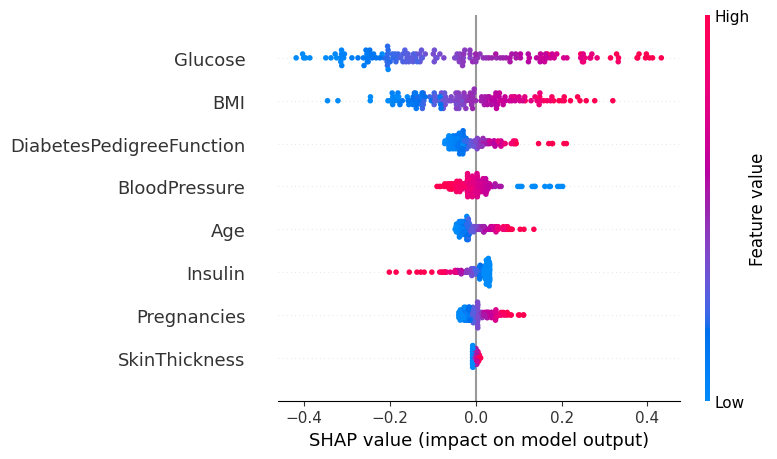

In [ ]:
import shap
import numpy as np
import pandas as pd

# Probability function for calibrated SVM (so that we get the probabilities for only class 1)
f_svm = lambda X: svm_calibrated.predict_proba(X)[:, 1]


bg_scaled = shap.sample(pd.DataFrame(X_train_smote), 200, random_state=42).to_numpy() #pick random 200 samples from the training set.
# We only pick 200 samples for SVM because SHAP has to approximate the explaination and taking the whole dataset will make it slower.


svm_explainer = shap.KernelExplainer(f_svm, bg_scaled) #creates a SHAP explainer that uses the probability function and the data to get the feature contribution


svm_sv = svm_explainer.shap_values(_________, nsamples="auto") #Computes SHAP values for samples in test set


if isinstance(svm_sv, list): #ensure the output is a 2d numpy array. Unwrap it if SHAP returns a list
    svm_sv = svm_sv[0]
svm_sv = np.asarray(svm_sv)


shap.summary_plot(
    svm_sv,
    features=_________,
    feature_names=list(_________.columns),
    plot_type="dot",
    max_display=len(X_train_raw.columns)
)



<h3>Based on the plot you obtain, please explain how would you interpret it here :</h3>